In [1]:
#LOF Begins here.

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [3]:
thedata=pd.read_csv('biggerXYsample.csv')

In [4]:
thedata

,x,y
0,8.975246,8.693209
1,10.328570,7.530441
2,9.495609,8.014501
3,9.728881,10.900843
4,10.714007,8.116514
...,...,...
375,4.765330,6.157725
376,4.797210,5.442967
377,5.078097,4.997000
378,4.421471,5.188666


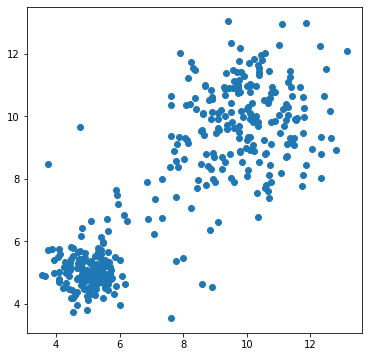

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(thedata['x'],thedata['y'])

In [6]:
from numpy import quantile,where
from sklearn.neighbors import LocalOutlierFactor

In [7]:
#We don't have to input the contamination, we could just 
#use n_neighbors in the following line:-
model = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = model.fit_predict(thedata)
LOF_Scores = model.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=thedata[LOF_pred==1]



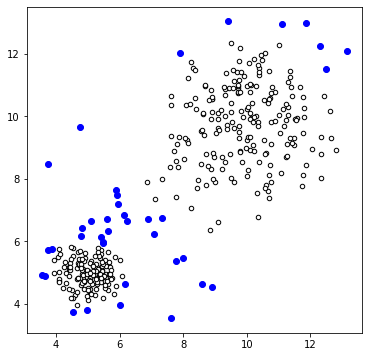

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(thedata['x'],thedata['y'],c='white',s=20,edgecolor='k')
plt.scatter(LOF_anomalies['x'],LOF_anomalies['y'],c='blue')

In [9]:
#Mahalanobis Distance begins here.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
thedata=pd.read_csv('biggerXYsample.csv')

In [12]:
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

def mahalanobis_method(df):
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           
    inv_covmat = sp.linalg.inv(cov)                     
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.05), df=df.shape[1]))    
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

In [13]:
outliers_mahal, md = mahalanobis_method(df=thedata)
outliers_mahal, md

([7, 9, 18, 49, 82, 85, 115, 139, 163, 178, 187, 209, 211, 221, 223, 227],
 array([0.46541037, 1.94352348, 1.05873826, 1.35252409, 1.86577209,
        1.00648199, 0.57303735, 3.07621873, 1.43211502, 2.49993837,
        1.32491859, 1.68157257, 1.39231119, 1.45580719, 0.92485533,
        1.43695131, 1.28713768, 1.88890908, 2.89251212, 1.49838704,
        0.76382094, 1.83814187, 1.79650324, 1.67907996, 1.26741976,
        0.85422186, 0.78542899, 1.2698946 , 1.27351767, 1.7337578 ,
        0.93516219, 1.03402456, 2.18945447, 0.97287309, 2.44616756,
        2.13202638, 1.24623586, 2.05644991, 0.97929938, 1.39976954,
        0.42625814, 2.36018308, 1.20431033, 1.56124402, 1.49835796,
        1.44202794, 1.3406555 , 1.97538739, 1.90351626, 2.45717773,
        2.40391909, 0.81266057, 1.30893267, 1.4312258 , 1.05132178,
        1.0555885 , 1.52943321, 1.38315529, 1.47141656, 1.17008796,
        1.63854979, 0.51371126, 0.46424122, 2.19795308, 1.53031719,
        0.92876627, 2.28978241, 1.8998231

In [14]:
column_names = ["X", "Y"]
outliers = pd.DataFrame(columns = column_names)

for n in outliers_mahal:
    outliers=outliers.append(thedata.iloc[n])

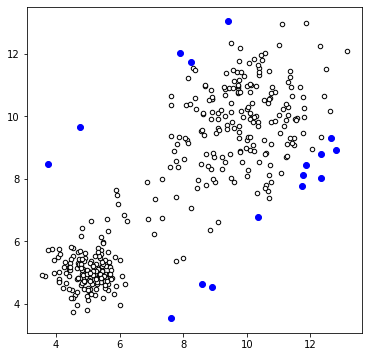

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(thedata['x'],thedata['y'],c='white',s=20,edgecolor='k')
plt.scatter(outliers['x'],outliers['y'],c='blue')

In [16]:
#Isolation Forest begins here.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import IsolationForest

In [18]:
thedata=pd.read_csv('biggerXYsample.csv')

In [19]:
ranst=np.random.RandomState(0)

model = IsolationForest(max_samples=100,random_state=ranst, contamination=.05) 
model.fit(thedata)
if_scores = model.decision_function(thedata)
if_anomalies=model.predict(thedata)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=thedata[if_anomalies==1];

In [20]:
if_anomalies

,x,y
7,12.347319,8.036159
18,12.792000,8.913420
32,12.629763,10.169639
37,13.139108,12.086049
63,11.094565,12.959845
82,9.404577,13.029356
95,11.013880,12.276055
109,12.289124,12.244284
115,7.909257,12.017912
139,12.665186,9.312501


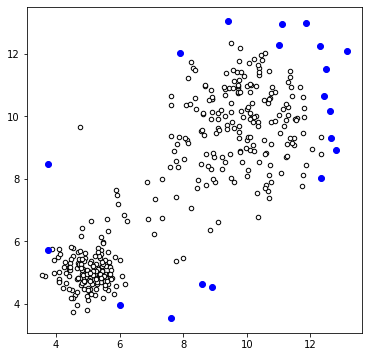

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(thedata['x'],thedata['y'],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies['x'],if_anomalies['y'],c='blue')